In [165]:
import pandas as pd
df = pd.read_csv('job_rawdata.csv')
df.head(1)

,jobName,custName,industry,workExp,edu,major,language,localLanguage,specialty,skill,...,salaryMin,salaryMax,addressRegion,addressDetail,manageResp,businessTrip,workPeriod,vacationPolicy,longitude,latitude
0,(TMR- ) 資料分析(機器學習)開發工程師,新漢股份有限公司,電腦及其週邊設備製造業,3年以上,大學、碩士,"['資訊工程相關', '電機電子工程相關', '其他數學及電算機科學相關']","[{'language': '英文', 'ability': '聽 /中等、說 /中等、讀 ...",[],[],[],...,0,0,新北市中和區,中正路920號10樓(元隆捷運雙星大樓A棟),不需負擔管理責任,無需出差外派,日班，09:00-18:00,依公司規定,121.483505,25.007868


### 移除跟資料或者數據沒有相關的職位

In [166]:
import numpy as np
count = 0
for k in range(0,9699):
    if '資料' in df.iloc[k]['jobName'] or '數據' in df.iloc[k]['jobName']:
        count += 1
    else:
        df.at[k, 'jobName'] = np.NaN

In [167]:
df = df.dropna()

### 處理主修科目major

我們只挑選前10大的major，剩下的我們歸類為其他科系

In [168]:
# 統計較多major的數量
import ast
major_list = []
for i in df['major']:
    for j in ast.literal_eval(i):
        major_list.append(j)
major_df = pd.DataFrame(major_list, columns = ['count'])
major_count = major_df.value_counts().head(10)
major_count

count       
資訊工程相關          223
資訊管理相關          164
數理統計相關           82
數學及電算機科學學科類      75
統計學相關            65
電機電子工程相關         51
其他數學及電算機科學相關     30
商業及管理學科類         25
應用數學相關           24
工程學科類            24
dtype: int64

In [169]:
# 建立較多科系的名稱list
major_name = []
for i in major_count.index:
    major_name.append(i[0])
major_name

['資訊工程相關',
 '資訊管理相關',
 '數理統計相關',
 '數學及電算機科學學科類',
 '統計學相關',
 '電機電子工程相關',
 '其他數學及電算機科學相關',
 '商業及管理學科類',
 '應用數學相關',
 '工程學科類']

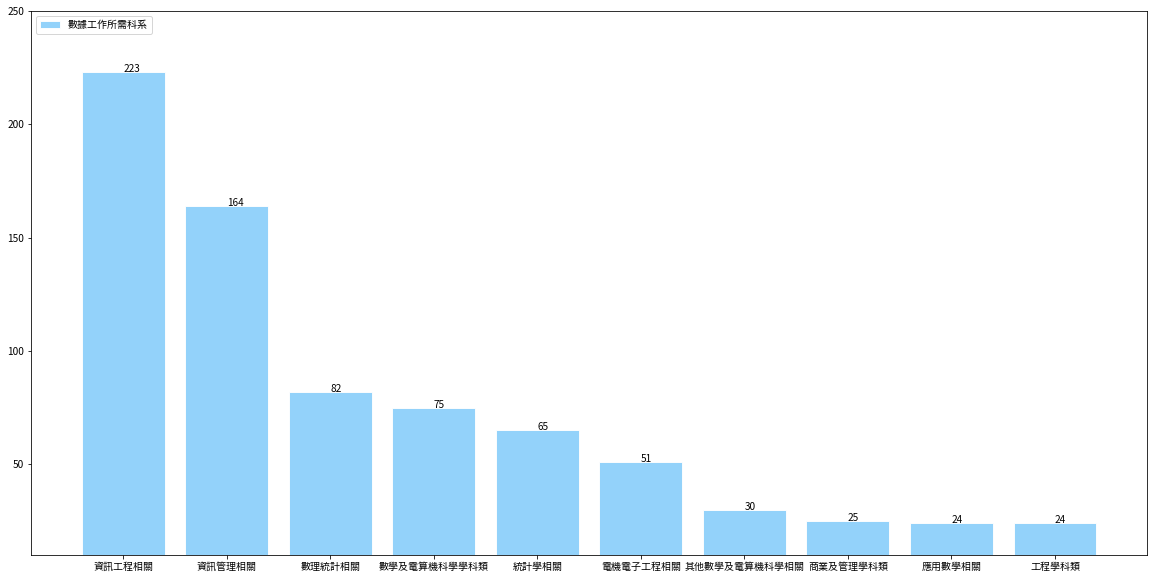

In [170]:
# 科系圖表分析
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.figure(figsize=(20,10))
plt.bar(major_name, major_count.values.tolist(), alpha=0.9, width = 0.8, facecolor = 'lightskyblue', edgecolor = 'white', label='數據工作所需科系', lw=1)
plt.legend(loc="upper left")
for i in range(10):
    plt.annotate('{}'.format(major_count.values.tolist()[i]),xy=(major_name[i],major_count.values.tolist()[i]))
plt.ylim(10,250)    

plt.savefig('數據工作所需科系.png')

In [171]:
# 用onehot shooting 的方法把科系分出來
import ast
for i in df.index.tolist():
    for j in ast.literal_eval(df.at[i, 'major']):
        if j in major_name:
            df.at[i, j] = 1
        else:
            df.at[i, '其他科系'] = 1
df[major_name].head()

,資訊工程相關,資訊管理相關,數理統計相關,數學及電算機科學學科類,統計學相關,電機電子工程相關,其他數學及電算機科學相關,商業及管理學科類,應用數學相關,工程學科類
0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
8,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0


### 處理擅長工具specialty

我們只挑選前10大的技能，剩下的我們歸類為其他技能

In [172]:
# 統計較多specialty的數量
import ast
specialty_list = []
for i in df['specialty']:
    for j in ast.literal_eval(i):
        specialty_list.append(j)
specialty_df = pd.DataFrame(specialty_list, columns = ['count'])
specialty_count = specialty_df.value_counts().head(10)
specialty_count

count     
Python        163
MS SQL        115
Excel          83
MySQL          67
R              64
PowerPoint     60
Word           56
Oracle         45
Java           45
Linux          43
dtype: int64

In [173]:
# 建立較多技能的名稱list
specialty_name = []
for i in specialty_count.index:
    specialty_name.append(i[0])
specialty_name

['Python',
 'MS SQL',
 'Excel',
 'MySQL',
 'R',
 'PowerPoint',
 'Word',
 'Oracle',
 'Java',
 'Linux']

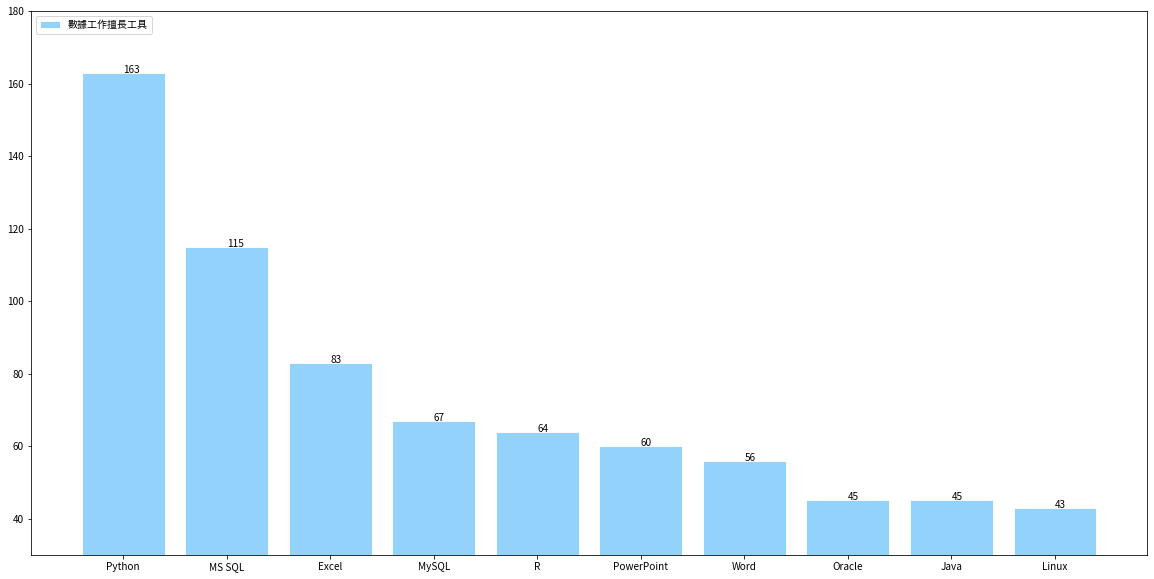

In [174]:
# 科系圖表分析
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.figure(figsize=(20,10))
plt.bar(specialty_name, specialty_count.values.tolist(), alpha=0.9, width = 0.8, facecolor = 'lightskyblue', edgecolor = 'white', label='數據工作擅長工具', lw=1)
plt.legend(loc="upper left")
for i in range(10):
    plt.annotate('{}'.format(specialty_count.values.tolist()[i]),xy=(specialty_name[i],specialty_count.values.tolist()[i]))
plt.ylim(30,180)    

plt.savefig('數據工作擅長工具.png')

In [175]:
# 用onehot shooting 的方法把科系分出來
import ast
for i in df.index.tolist():
    for j in ast.literal_eval(df.at[i, 'specialty']):
        if j in specialty_name:
            df.at[i, j] = 1
        else:
            df.at[i, '其他擅長工具'] = 1
df[specialty_name].head(10)

,Python,MS SQL,Excel,MySQL,R,PowerPoint,Word,Oracle,Java,Linux
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
14,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN
15,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN
16,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
30,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN


### 處理技能skill

In [176]:
# 先統計技能的數量
import ast
skill_list = []
for i in df['skill']:
    for j in ast.literal_eval(i):
        skill_list.append(j['description'])

skill_df = pd.DataFrame(skill_list, columns = ['count'])
skill_count = skill_df.value_counts().head(10)
skill_count

count           
資料庫軟體應用             57
資料庫系統管理維護           49
資料庫程式設計             45
軟體程式設計              44
Machine Learning    22
系統整合分析              17
系統架構規劃              17
軟體工程系統開發            14
系統架構規劃與維護           14
提案與簡報技巧             12
dtype: int64

In [177]:
# 建立較多技能的名稱list
skill_name = []
for i in skill_count.index:
    skill_name.append(i[0])
skill_name

['資料庫軟體應用',
 '資料庫系統管理維護',
 '資料庫程式設計',
 '軟體程式設計',
 'Machine Learning',
 '系統整合分析',
 '系統架構規劃',
 '軟體工程系統開發',
 '系統架構規劃與維護',
 '提案與簡報技巧']

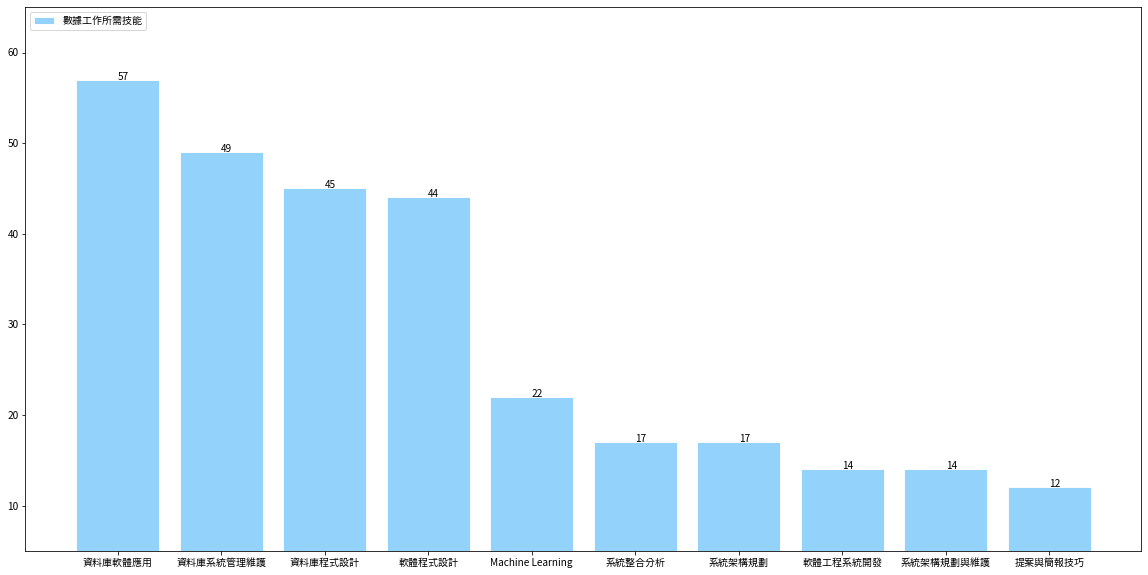

In [178]:
# 科系圖表分析
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.figure(figsize=(20,10))
plt.bar(skill_name, skill_count.values.tolist(), alpha=0.9, width = 0.8, facecolor = 'lightskyblue', edgecolor = 'white', label='數據工作所需技能', lw=1)
plt.legend(loc="upper left")
for i in range(10):
    plt.annotate('{}'.format(skill_count.values.tolist()[i]),xy=(skill_name[i],skill_count.values.tolist()[i]))
plt.ylim(5,65) 

plt.savefig('數據工作所需技能.png')

In [179]:
# 用onehot shooting 的方法把科系分出來
import ast
for i in df.index.tolist():
    for j in ast.literal_eval(df.at[i, 'skill']):
        if j['description'] in skill_name:
            df.at[i, j['description']] = 1
        else:
            df.at[i, '其他技能'] = 1
df[skill_name].head(10)

,資料庫軟體應用,資料庫系統管理維護,資料庫程式設計,軟體程式設計,Machine Learning,系統整合分析,系統架構規劃,軟體工程系統開發,系統架構規劃與維護,提案與簡報技巧
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 處理薪水

In [180]:
# 先把待遇面議最小值改為40000
for i in df.index.tolist():
    if df.at[i,'salary'] == '待遇面議':
        df.at[i,'salaryMin'] = 40000

In [181]:
# 年薪轉成月薪，先以月薪100000為限制
for i in df.index.tolist():
    if df.at[i,'salaryMin'] > 100000:
        df.at[i,'salaryMin'] = df.at[i,'salaryMin'] / 12

In [214]:
df.groupby('addressRegion').min().sort_values('salary', ascending = False)['salary']

addressRegion
屏東縣長治鄉          月薪50,000~70,000元
高雄市鼓山區          月薪40,000~70,000元
台中市北屯區          月薪40,000~55,000元
高雄市燕巢區               月薪36,000元以上
桃園市楊梅區               月薪35,000元以上
台中市大甲區          月薪33,000~43,000元
苗栗縣三義鄉          月薪32,000~55,000元
台中市梧棲區          月薪32,000~55,000元
台中市北區           月薪32,000~40,000元
新北市鶯歌區          月薪32,000~38,000元
高雄市左營區          月薪32,000~38,000元
新北市深坑區          月薪31,000~70,000元
台中市南區           月薪30,000~50,000元
桃園市桃園區          月薪30,000~40,000元
宜蘭縣礁溪鄉          月薪30,000~32,000元
新竹縣關西鎮          月薪30,000~32,000元
台南市東區                月薪25,000元以上
台南市永康區          月薪25,000~30,000元
台中市大里區          月薪24,500~33,000元
新竹縣竹東鎮                      待遇面議
新竹市                         待遇面議
高雄市路竹區                      待遇面議
新竹縣湖口鄉                      待遇面議
新竹縣竹北市                      待遇面議
高雄市前鎮區                      待遇面議
苗栗縣竹南鎮                      待遇面議
桃園市中壢區                      待遇面議
桃園市平鎮區                      待遇面議
高雄市楠梓區                      待遇面議
新北市汐止區                      待

In [199]:
df[df['industry']=='生化科技研發業'].head(1)

,jobName,custName,industry,workExp,edu,major,language,localLanguage,specialty,skill,...,其他技能,軟體程式設計,資料庫軟體應用,系統架構規劃,軟體工程系統開發,資料庫系統管理維護,系統架構規劃與維護,系統整合分析,資料庫程式設計,提案與簡報技巧
6,Reporting & Data Quality Specialist (統計及資料分析專員),汎球生物科技股份有限公司,生化科技研發業,1年以上,大學、碩士,"['數理統計相關', '應用數學相關', '資訊工程相關']","[{'language': '英文', 'ability': '聽 /中等、說 /中等、讀 ...",[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 分隔年資

In [198]:
df['workExp'].unique()

array(['3年以上', '2年以上', '不拘', '1年以上', '5年以上', '10年以上', '7年以上', '4年以上',
       '8年以上', '6年以上'], dtype=object)

In [ ]:
for i in df.index.tolist():
    if df.at[i,'workExp'] == '待遇面議':
        df.at[i,'salaryMin'] = 40000

In [128]:
df.groupby('addressRegion').count().sort_values('jobName', ascending = False)['salaryMin'].head(10)

addressRegion
台北市內湖區    99
台北市信義區    67
台北市松山區    57
台北市大安區    49
台北市中山區    41
新竹市       39
台中市西屯區    29
台北市南港區    24
台北市中正區    17
新北市汐止區    14
Name: salaryMin, dtype: int64

In [132]:
df.groupby('industry').count().sort_values('jobName', ascending = False)[specialty_name].head(10)

,Python,MS SQL,Excel,MySQL,R,PowerPoint,Word,Oracle,Java,Linux
industry,,,,,,,,,,
電腦軟體服務業,21,19,12,18,7,4,4,8,9,15
網際網路相關業,21,9,7,13,13,6,4,6,9,5
電腦系統整合服務業,14,11,2,6,2,2,2,4,4,2
金融控股業,3,3,0,0,1,0,0,1,1,2
其它軟體及網路相關業,11,4,3,1,3,3,3,0,2,5
電腦及其週邊設備製造業,9,4,0,0,0,0,0,1,3,1
半導體製造業,7,4,1,1,3,1,1,6,0,1
銀行業,3,3,1,1,0,1,1,2,0,1
政府／民意機關,0,0,0,0,0,0,0,0,0,0


In [203]:
df.groupby('custName').count().sort_values('jobName', ascending = False).head(20)

,jobName,industry,workExp,edu,major,language,localLanguage,specialty,skill,certificate,...,其他技能,軟體程式設計,資料庫軟體應用,系統架構規劃,軟體工程系統開發,資料庫系統管理維護,系統架構規劃與維護,系統整合分析,資料庫程式設計,提案與簡報技巧
custName,,,,,,,,,,,,,,,,,,,,,
國泰金控_國泰金融控股股份有限公司,26,26,26,26,26,26,26,26,26,26,...,0,1,1,1,1,1,1,0,0,0
財團法人國家實驗研究院,15,15,15,15,15,15,15,15,15,15,...,0,0,0,0,0,0,0,0,0,0
工研院 _財團法人工業技術研究院,8,8,8,8,8,8,8,8,8,8,...,0,0,0,0,0,0,0,0,0,0
鴻海精密工業股份有限公司,7,7,7,7,7,7,7,7,7,7,...,0,0,0,0,0,0,0,0,0,0
遊戲橘子數位科技股份有限公司,7,7,7,7,7,7,7,7,7,7,...,0,0,0,0,0,0,0,0,0,0
"大江生醫股份有限公司(TCI CO., Ltd)",6,6,6,6,6,6,6,6,6,6,...,1,0,0,0,0,0,0,0,0,0
精誠資訊股份有限公司,6,6,6,6,6,6,6,6,6,6,...,1,0,1,0,0,0,1,0,0,0
華碩電腦股份有限公司,6,6,6,6,6,6,6,6,6,6,...,0,0,0,0,0,0,0,0,0,0
凡谷興業有限公司,5,5,5,5,5,5,5,5,5,5,...,0,0,0,0,0,0,0,0,0,0


In [201]:
df.groupby('industry').count().sort_values('jobName', ascending = False)[major_name].head(10)

,資訊工程相關,資訊管理相關,數理統計相關,數學及電算機科學學科類,統計學相關,電機電子工程相關,其他數學及電算機科學相關,商業及管理學科類,應用數學相關,工程學科類
industry,,,,,,,,,,
電腦軟體服務業,27,15,11,4,7,7,6,1,4,3
網際網路相關業,21,25,12,5,7,2,2,2,3,0
電腦系統整合服務業,14,9,6,1,2,0,4,1,2,1
金融控股業,9,2,9,11,1,1,0,3,1,1
其它軟體及網路相關業,10,7,3,7,3,3,1,1,1,0
電腦及其週邊設備製造業,18,9,2,4,2,8,1,0,0,2
半導體製造業,12,8,4,2,1,6,4,0,1,0
銀行業,7,7,2,2,2,1,1,0,0,0
政府／民意機關,13,2,0,0,1,0,0,0,0,6
